In [1]:
import numpy as np
import tensorflow as tf

In [25]:

# 한글 자료 
raw_inputs = [
             "춤을 추는 쏘세지"
]

words = []
for s in raw_inputs:
    words.extend(s.split()) # extend : s를 추가한다.

print(words)

## 중복된 단어를 제거
words = list(dict.fromkeys(words))
print(words)

## 단어장의 특수한 토큰을 삽입
word_to_id = {"<PAD>" : 0, "<UNK>" : 1}

for w in words:
    word_to_id[w] = len(word_to_id)
    print(word_to_id)

print(word_to_id.items())

['춤을', '추는', '쏘세지']
['춤을', '추는', '쏘세지']
{'<PAD>': 0, '<UNK>': 1, '춤을': 2}
{'<PAD>': 0, '<UNK>': 1, '춤을': 2, '추는': 3}
{'<PAD>': 0, '<UNK>': 1, '춤을': 2, '추는': 3, '쏘세지': 4}
dict_items([('<PAD>', 0), ('<UNK>', 1), ('춤을', 2), ('추는', 3), ('쏘세지', 4)])


In [27]:
id_to_words = {i : w for w, i in word_to_id.items()}
print(id_to_words)

train_inputs = []
for s in raw_inputs:
    row = [word_to_id[w] for w in s.split()]

    # padding 
    row += [0] * (5-len(row))
    train_inputs.append(row)

train_inputs = np.array(train_inputs)
print(train_inputs)

{0: '<PAD>', 1: '<UNK>', 2: '춤을', 3: '추는', 4: '쏘세지'}
[[2 3 4 0 0]]


In [28]:
# one-hot matrix 생성
onehot_matrix = np.eye(len(word_to_id))
print(onehot_matrix)
print(onehot_matrix.shape) # 단어장은 7개인데, 0, 1번째 row는 token을 의미한다.

train_onehot = onehot_matrix[train_inputs]
print(train_onehot)

# one hot coding -> sequence 형태로 복원 가능
# 모델에 집어 넣기 전에 squence형태로 복원한다.
train_seq = np.argmax(train_onehot, axis = -1)
print(train_seq)

train_seq_len = train_onehot.shape
inp = tf.convert_to_tensor(train_seq, dtype=tf.int32)
inp_len = tf.convert_to_tensor(train_seq_len, dtype=tf.int32)


print(inp)
print(inp_len)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
(5, 5)
[[[0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]
  [1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0.]]]
[[2 3 4 0 0]]
tf.Tensor([[2 3 4 0 0]], shape=(1, 5), dtype=int32)
tf.Tensor([1 5 5], shape=(3,), dtype=int32)


## 영문 문장 sequence를 만들기 

In [33]:

# 한글 자료 
raw_inputs = [
              "Dancing Sausage",
              "Sausage is delicious. How is this sausage made?",
              "sausage, meat product made of finely chopped and seasoned meat, which may be fresh, smoked, or pickled and which is then usually stuffed into a casing."
]

words = []
for s in raw_inputs:
    words.extend(s.split()) # extend : s를 추가한다.

print(words)

## 중복된 단어를 제거
words = list(dict.fromkeys(words))
print(words)

## 단어장의 특수한 토큰을 삽입
word_to_id = {"<PAD>" : 0, "<UNK>" : 1}

for w in words:
    word_to_id[w] = len(word_to_id)
    print(word_to_id)

print(word_to_id.items())

['Dancing', 'Sausage', 'Sausage', 'is', 'delicious.', 'How', 'is', 'this', 'sausage', 'made?', 'sausage,', 'meat', 'product', 'made', 'of', 'finely', 'chopped', 'and', 'seasoned', 'meat,', 'which', 'may', 'be', 'fresh,', 'smoked,', 'or', 'pickled', 'and', 'which', 'is', 'then', 'usually', 'stuffed', 'into', 'a', 'casing.']
['Dancing', 'Sausage', 'is', 'delicious.', 'How', 'this', 'sausage', 'made?', 'sausage,', 'meat', 'product', 'made', 'of', 'finely', 'chopped', 'and', 'seasoned', 'meat,', 'which', 'may', 'be', 'fresh,', 'smoked,', 'or', 'pickled', 'then', 'usually', 'stuffed', 'into', 'a', 'casing.']
{'<PAD>': 0, '<UNK>': 1, 'Dancing': 2}
{'<PAD>': 0, '<UNK>': 1, 'Dancing': 2, 'Sausage': 3}
{'<PAD>': 0, '<UNK>': 1, 'Dancing': 2, 'Sausage': 3, 'is': 4}
{'<PAD>': 0, '<UNK>': 1, 'Dancing': 2, 'Sausage': 3, 'is': 4, 'delicious.': 5}
{'<PAD>': 0, '<UNK>': 1, 'Dancing': 2, 'Sausage': 3, 'is': 4, 'delicious.': 5, 'How': 6}
{'<PAD>': 0, '<UNK>': 1, 'Dancing': 2, 'Sausage': 3, 'is': 4, 'deli

In [50]:
id_to_words = {i : w for w, i in word_to_id.items()}
print(id_to_words)

train_inputs = []
for s in raw_inputs:
    row = [word_to_id[w] for w in s.split()]

    # padding 
    row += [0] * (5-len(row))
    train_inputs.append(row)

y_train_inputs = np.array(train_inputs)
print("y_train_inputs : ", y_train_inputs)

{0: '<PAD>', 1: '<UNK>', 2: 'Dancing', 3: 'Sausage', 4: 'is', 5: 'delicious.', 6: 'How', 7: 'this', 8: 'sausage', 9: 'made?', 10: 'sausage,', 11: 'meat', 12: 'product', 13: 'made', 14: 'of', 15: 'finely', 16: 'chopped', 17: 'and', 18: 'seasoned', 19: 'meat,', 20: 'which', 21: 'may', 22: 'be', 23: 'fresh,', 24: 'smoked,', 25: 'or', 26: 'pickled', 27: 'then', 28: 'usually', 29: 'stuffed', 30: 'into', 31: 'a', 32: 'casing.'}
y_train_inputs :  [list([2, 3, 0, 0, 0]) list([3, 4, 5, 6, 4, 7, 8, 9])
 list([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 17, 20, 4, 27, 28, 29, 30, 31, 32])]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':


# seq2seq 모델

![](https://aiffelstaticprd.blob.core.windows.net/media/images/GN-4-L-7.max-800x600.jpg)

## Encoder 구현

![](https://aiffelstaticprd.blob.core.windows.net/media/images/GN-4-L-6.max-800x600.jpg)

In [35]:
import tensorflow as tf

In [36]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units): # enc_units :encode hidden unit
        super(Encoder, self).__init__()
        # Embedding의 인자는 외우면 좋다. 이해하면 더 좋다.
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim) # 나는 밥을 먹었어
        self.lstm = tf.keras.layers.LSTM(enc_units) # enc_units :encode hidden unit
    
    def call(self, x):     # x는 sequence 형태(숫자 형태)로 넣어야 한다.
        print("입력 shape :", x.shape) # sample input // 춤 추는 소시지 (1, 3)
        print("입력 값 :", x)
        # Embedding Layer를 거친 shape : (1, 3, 256) 한 문장의 3개 단어, 단어당 256개의 vector가 존재함
        x = self.embedding(x) # ex) (0.699, 0.92, 0.89) = self.embedding((0, 1, 2))
        print("Embedding Layer를 거친 shape :", x.shape)

        output = self.lstm(x)
        print("LSTM shape의 output shape :", output.shape)
        
        return output

In [37]:
vocab_size = 30000
emb_size = 256
lstm_size = 512
batch_size = 1
sample_seq_len = 3 # 춤 추는 소시지가 3 단어이기 때문에 값이 3

print("Vocab Size : {0}".format(vocab_size))
print("Embedding Size : {0}".format(emb_size))
print("LSTM Size : {0}".format(lstm_size))
print("Batch_size : {0}".format(batch_size))
print("Sample Sequence Length : {0}".format(sample_seq_len))

Vocab Size : 30000
Embedding Size : 256
LSTM Size : 512
Batch_size : 1
Sample Sequence Length : 3


In [39]:
encoder = Encoder(vocab_size, emb_size, lstm_size) #vocab_size, embedding_dim, enc_units):
# 테스트할 때는 sample_input = (0, 0, 0)으로 초기화로 값을 넣다.
sample_input = tf.zeros((batch_size, sample_seq_len)) # 춤 추는 소시지


sample_output_encoder = encoder(sample_input)
sample_output_encoder_test = encoder(inp) # 안되는 걸 보니 평문이 아닌 one hot코딩?

입력 shape : (1, 3)
입력 값 : tf.Tensor([[0. 0. 0.]], shape=(1, 3), dtype=float32)
Embedding Layer를 거친 shape : (1, 3, 256)
LSTM shape의 output shape : (1, 512)
입력 shape : (1, 5)
입력 값 : tf.Tensor([[2 3 4 0 0]], shape=(1, 5), dtype=int32)
Embedding Layer를 거친 shape : (1, 5, 256)
LSTM shape의 output shape : (1, 512)


## Decoder 구현

![](https://aiffelstaticprd.blob.core.windows.net/media/images/GN-4-L-7.max-800x600.jpg)

In [40]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        # return_sequences=True 이전 state의 정보를 각각 다 출력한다는 의미
        # False면 <END> 토큰만 나온다. True면 dancing, Sausage 도 출력이 된다.
        self.lstm = tf.keras.layers.LSTM(dec_units, return_sequences=True) ####
        
        # Full connected Layer = Dense = mlp(multi layer perceptron) 결국 같은 말이다.
        # Full connected Layer : 현재 층의 모든 뉴런이 완전히 다음 층의 모든 뉴런과 연결되었다
        # 꼭 relu 아니어도 되고, activation이 없어도 된다.
        self.fc = tf.keras.layers.Dense(vocab_size,  activation='relu') # full connect Layer
        # self.softmax = tf.keras.layers.Dense(dec_units, activation='softmax')# None (변수 5)
        self.softmax = tf.keras.layers.Softmax(axis= -1 )

    def call(self, x, context_v):
        print("입력 shape : ", x.shape)
        print("입력 값 :", x)

        x = self.embedding(x)
        print("Embedding layer를 거친 shape", x.shape)

        # expand_dims : 행렬을 추가해준다.
        # 행렬을 늘려서 x와 context_v가 행렬 계산이 가능하도록 shape를 맞춰준다.
        # tf.expand_dims(context_v, axis=1)은 (1, 512)에서 512(1축)를 의미한다.
        context_v = tf.repeat(tf.expand_dims(context_v, axis=1), repeats=x.shape[1], axis=1)
        x = tf.concat([x, context_v], axis = -1) # [변수 1, 변수 2], axis = -1)
        print('Context Vector가 더해진 shape : ', x.shape)

        x = self.lstm(x)
        print("LSTM layer의 output layer : ", x.shape)

        output = self.fc(x)
        print("Decoder의 최종 ouput layer : ", output.shape)

        output = self.softmax(output)

        return output

In [41]:
vocab_size = 30000
emb_size = 256
lstm_size = 512
batch_size = 1
sample_seq_len = 3

print("Vocab Size : {0}".format(vocab_size))
print("Embedding Size : {0}".format(emb_size))
print("LSTM Size : {0}".format(lstm_size))
print("Batch_size : {0}".format(batch_size))
print("Sample Sequence Length : {0}".format(sample_seq_len))

Vocab Size : 30000
Embedding Size : 256
LSTM Size : 512
Batch_size : 1
Sample Sequence Length : 3


In [54]:
decoder = Decoder(vocab_size, emb_size, lstm_size)
sample_input = tf.zeros((batch_size, sample_seq_len)) # (1, 3) 행렬이 0으로 채워진다.

sample_output_decoder = decoder(sample_input, sample_output_encoder) # call 함수 호출

print(sample_output_decoder)

# 춤을 추는 쏘세지는 어떻게 나올까?
# decoder = Decoder(vocab_size, emb_size, lstm_size)
# sample_input_test_eng= y_train_inputs # 이 부분을 영문에 해당되는 sequence를 넣어준다. 즉 y_train 값이다.

# sample_output_decoder_eng = decoder(sample_input_test_eng, sample_output_encoder_test)

# print(sample_output_decoder_eng)

입력 shape :  (1, 3)
입력 값 : tf.Tensor([[0. 0. 0.]], shape=(1, 3), dtype=float32)
Embedding layer를 거친 shape (1, 3, 256)
Context Vector가 더해진 shape :  (1, 3, 768)
LSTM layer의 output layer :  (1, 3, 512)
Decoder의 최종 ouput layer :  (1, 3, 30000)
tf.Tensor(
[[[0.00195047 0.0019539  0.0019531  ... 0.00195506 0.00195302 0.00195321]
  [0.00194853 0.00195467 0.00195299 ... 0.00195646 0.00195285 0.00195318]
  [0.00194712 0.00195546 0.00195279 ... 0.00195754 0.00195274 0.00195317]]], shape=(1, 3, 512), dtype=float32)


# Attention

- Bahdanau Attention
$$ Score_{alignment} = W * tanh(W_{decoder} * H_{decoder} + W_{encoder} * H_{encoder}) $$

In [13]:
import tensorflow as tf

In [55]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_decoder = tf.keras.layers.Dense(units)
        self.w_encoder = tf.keras.layers.Dense(units)
        self.w_combine = tf.keras.layers.Dense(1) # 값을 합치기 때문에 1로 설정한다.
    
    def call(self, h_encoder, h_decoder):
        print("[H_encoder] shape : ", h_encoder.shape)

        h_encoder = self.w_encoder(h_encoder)
        print("[w_encoder x h_encoder] shape : ", h_encoder.shape)

        print("\n[H_decoder shape :", h_decoder.shape)
        h_decoder = tf.expand_dims(h_decoder, 1)
        h_decoder = self.w_decoder(h_decoder)

        print("[w_encoder x h_decoder] shape :", h_decoder.shape)

        score = self.w_combine(tf.nn.tanh(h_decoder + h_encoder))
        print("[score alinment] shape :", score.shape)

        attention_weights = tf.nn.softmax(score, axis=1)
        print("\n최종 weight : \n", attention_weights.numpy())

        context_vector = attention_weights * h_decoder
        context_vector = tf.reduce_sum(context_vector, axis = 1)

        return context_vector, attention_weights

In [56]:
w_size = 100
print("hidden state {0}차원으로 Mapping \n".format(w_size))

attention = BahdanauAttention(w_size)

enc_state = tf.random.uniform((1, 10, 512))
dec_state = tf.random.uniform((1, 512))

_ = attention(enc_state, dec_state)

hidden state 100차원으로 Mapping 

[H_encoder] shape :  (1, 10, 512)
[w_encoder x h_encoder] shape :  (1, 10, 100)

[H_decoder shape : (1, 512)
[w_encoder x h_decoder] shape : (1, 1, 100)
[score alinment] shape : (1, 10, 1)

최종 weight : 
 [[[0.15979587]
  [0.07183252]
  [0.12006551]
  [0.05205782]
  [0.06597082]
  [0.07402176]
  [0.12115809]
  [0.07401933]
  [0.125352  ]
  [0.13572636]]]


# Loung Attention

$$ Score(H_{target},H_{source}) = H_{target}^T * W_{combine} * H_{source}$$

In [57]:
class LuongAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(LuongAttention, self).__init__()
        self.w_combine = tf.keras.layers.Dense(units)

    def call(self, h_encoder, h_decoder):
        print("[h_encoder] shape : ", h_encoder.shape)

        wh = self.w_combine(h_encoder)
        print("[W_encoder x h_encoder] shape :", wh.shape)

        h_decoder = tf.expand_dims(h_decoder, 1)
        alignment = tf.matmul(wh, tf.transpose(h_decoder, [0, 2, 1]))
        print("[Score alignment] shape : ", alignment.shape)

        attention_weights = tf.nn.softmax(alignment, axis=1)
        print("\n 최종 weight : \n", attention_weights.numpy())

        # 다시 행렬 차원을 줄인다.
        attention_weights = tf.squeeze(attention_weights, axis= -1)
        context_vector = tf.matmul(attention_weights, h_encoder)

        return context_vector, attention_weights

In [58]:
emb_dim = 512
attention = LuongAttention(emb_size)

enc_state = tf.random.uniform((1, 10, emb_size))
dec_state = tf.random.uniform((1, emb_size))

_ = attention(enc_state, dec_state)

[h_encoder] shape :  (1, 10, 256)
[W_encoder x h_encoder] shape : (1, 10, 256)
[Score alignment] shape :  (1, 10, 1)

 최종 weight : 
 [[[1.4172524e-01]
  [1.3149093e-03]
  [3.8371602e-04]
  [6.6584784e-05]
  [2.6182837e-03]
  [9.1909263e-03]
  [4.0929201e-03]
  [3.9876853e-03]
  [5.4108638e-01]
  [2.9553339e-01]]]


## Softmax

In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [62]:
pred_logit = np.array([-2, 1.5, -1, 0.5, 2])
pred_prob = softmax(pred_logit)

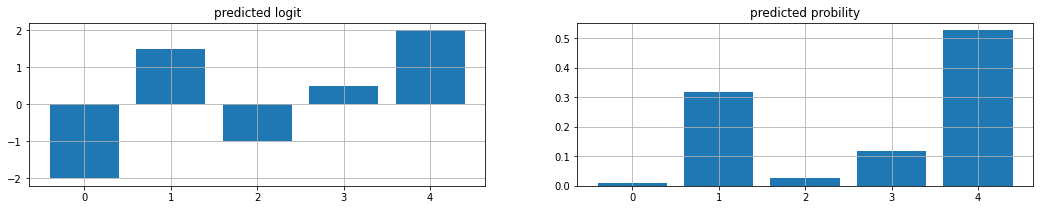

In [66]:
plt.figure(figsize = [18, 3])
plt.subplot(1, 2, 1)
plt.title('predicted logit')
plt.bar(np.arange(len(pred_logit)), pred_logit)
plt.grid()

plt.subplot(1, 2, 2)
plt.title('predicted probility')
plt.bar(np.arange(len(pred_prob)), pred_prob)
plt.grid()
plt.show()